<b>Melissa Laurino<br></b>
Data Analysis - Spring 2018 - Stockton University<br>
Part 2 - Principal Component Analysis (PCA) - Professor Russ Manson<br>

Implement your own PCA for a dataset with many features. <br>Reduce it to 2 or 3 features and visualize it in those 2 or 3 dimensions.

In [1]:
#Import necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.decomposition import PCA #PCA library
from sklearn import preprocessing #Using scaled data
#import seaborn as sns

The <b>Blacklip Abalone</b> (<i>Haliotis rubra</i>) is a large endemic Australian species of gastropod. The species gets their common name because of a black edged foot. The species is also susceptible to overfishing: https://www.dpi.nsw.gov.au/__data/assets/pdf_file/0009/375858/BlacklipAbalone.pdf

Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names<br>
Data description: https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names<br>
<b>Original data source: </b>Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and
	Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_
	species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North
	Coast and Islands of Bass Strait", Sea Fisheries Division, Technical
	Report No. 48 (ISSN 1034-3288)

In [2]:
abalone = pd.read_csv('abalone.data.txt',header=None)

Sex(0),Length(1),Diameter(2),Height(3),Whole weight(4),Shucked weight(5),Viscera weight(6),Shell weight(7),Rings(8)<br><br>
Sex was recorded as I, M, and F. The record were changed to 0(Infant), 1(Male) and 2(Female) for PCA analysis.

In [3]:
print(abalone)

      0      1      2      3       4       5       6       7   8
0     1  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.1500  15
1     1  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
2     2  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
3     1  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
4     0  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
5     0  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.1200   8
6     2  0.530  0.415  0.150  0.7775  0.2370  0.1415  0.3300  20
7     2  0.545  0.425  0.125  0.7680  0.2940  0.1495  0.2600  16
8     1  0.475  0.370  0.125  0.5095  0.2165  0.1125  0.1650   9
9     2  0.550  0.440  0.150  0.8945  0.3145  0.1510  0.3200  19
10    2  0.525  0.380  0.140  0.6065  0.1940  0.1475  0.2100  14
11    1  0.430  0.350  0.110  0.4060  0.1675  0.0810  0.1350  10
12    1  0.490  0.380  0.135  0.5415  0.2175  0.0950  0.1900  11
13    2  0.535  0.405  0.145  0.6845  0.2725  0.1710  0.2050  10
14    2  0.470  0.355  0.

In [3]:
#Read data as floats, not integers.
abalone = abalone.astype(float)

In [4]:
#Create a new dataframe for the data we wish to examine:
alldata = abalone[[1,2,3,4,5,6,7,8]].copy()
# Add column names to dataframe
alldata.columns = ['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight','Shell Weight', 'Rings']

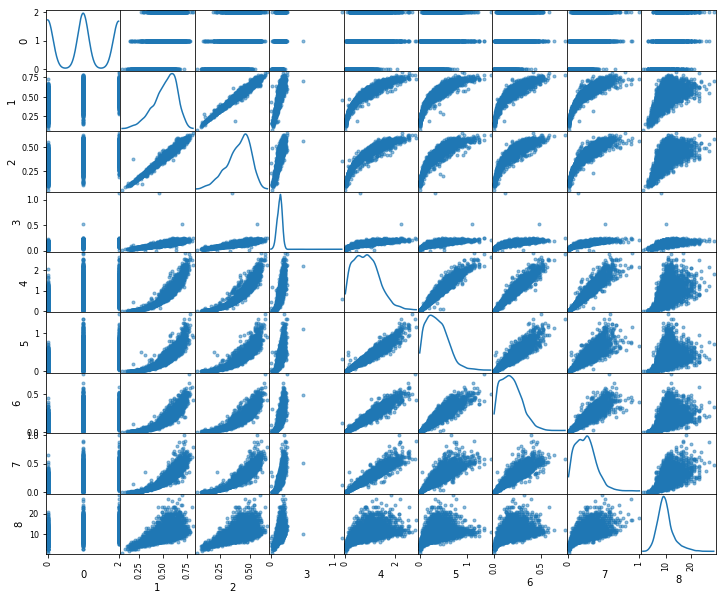

In [5]:
pd.scatter_matrix(abalone, alpha=0.5, figsize=(12, 10), diagonal='kde')
plt.show()

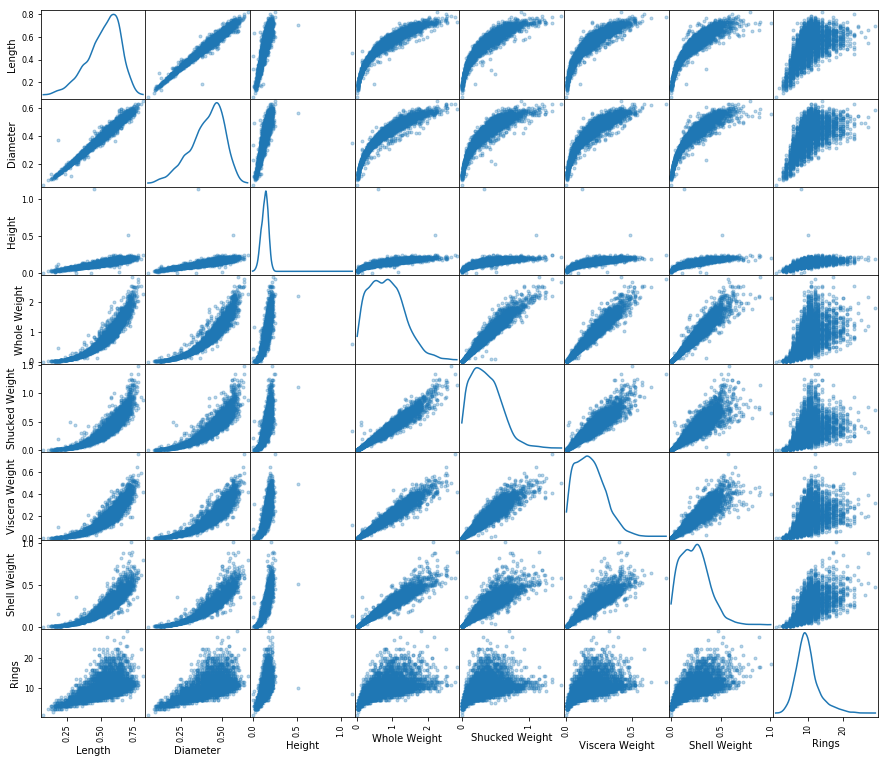

In [6]:
#Create a new dataframe for the data we wish to examine:
alldata = abalone[[1,2,3,4,5,6,7,8]].copy()
#Add column names to dataframe
alldata.columns = ['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight','Shell Weight', 'Rings']

pd.scatter_matrix(alldata, alpha=0.3, figsize=(15, 13), diagonal='kde')
plt.show()

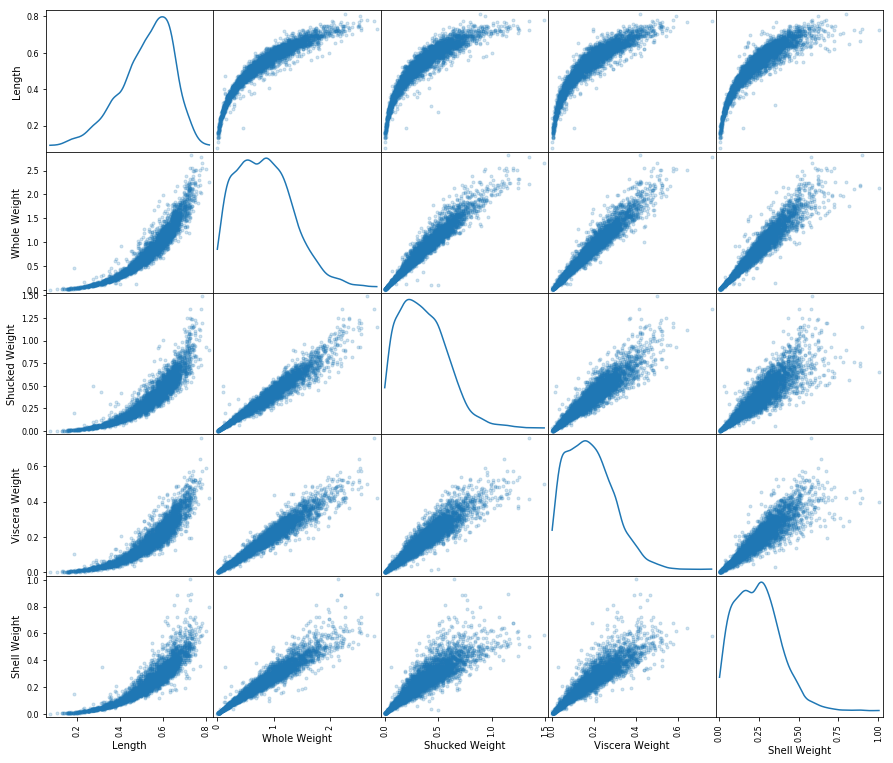

In [7]:
#Now that we hav visualized all the data, we can choose which to analyze with PCA:

#Create a new dataframe for the data we wish to examine:
pca_data = abalone[[1,4,5,6,7]].copy()
#Add column names to dataframe
pca_data.columns = ['Length','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight']

pd.scatter_matrix(pca_data, alpha=0.2, figsize=(15, 13), diagonal='kde')
plt.show()

In [8]:
#Next, we will take the original features of the dataset and scale them so they have zero mean and unit variance.
#Scaling or normalizing data is important to do for many machine learning algorithms for comparing results.

#Create a new scaled data object from the original data
ds = preprocessing.scale(pca_data)

#Use a Pandas data frame
data_scaled = pd.DataFrame(ds,columns = pca_data.columns)

#Perform PCA to reduce to N components, it is possible to have more than 2 N components, creating more than 2
#will results in the 3D versions of PCA graphing techniques.
N = 2
pca = PCA(n_components=N)
XR = pca.fit_transform(data_scaled) #This will be the data used for our graphing method
indexnames = []
for i in range(N):
    indexnames.append('PC-'+str(i+1))

#Put the Principal Components in their own dataframe:

Principal_component_coefficents =  pd.DataFrame(pca.components_,columns=data_scaled.columns,index=indexnames)

print('PC Coefficients:')
print (Principal_component_coefficents)
print('')
print('Explained variance ratios:')
print(pca.explained_variance_ratio_)
print('')
print ('First principal component explains ', 100*pca.explained_variance_ratio_[0], ' % of the variance')
print('')
print('Header of original data:')
print (pca_data.head())
print('')
print('Header of scaled data:')
print (data_scaled.head())
print('')
print('First five rows of PCA data:')
print (XR[0:5,:])

PC Coefficients:
        Length  Whole Weight  Shucked Weight  Viscera Weight  Shell Weight
PC-1  0.440230      0.458797        0.446012        0.448590      0.442203
PC-2 -0.410763      0.115164        0.602315        0.287954     -0.610172

Explained variance ratios:
[ 0.93917799  0.02488383]

First principal component explains  93.9177991487  % of the variance

Header of original data:
   Length  Whole Weight  Shucked Weight  Viscera Weight  Shell Weight
0   0.455        0.5140          0.2245          0.1010         0.150
1   0.350        0.2255          0.0995          0.0485         0.070
2   0.530        0.6770          0.2565          0.1415         0.210
3   0.440        0.5160          0.2155          0.1140         0.155
4   0.330        0.2050          0.0895          0.0395         0.055

Header of scaled data:
     Length  Whole Weight  Shucked Weight  Viscera Weight  Shell Weight
0 -0.574558     -0.641898       -0.607685       -0.726212     -0.638217
1 -1.448986     -1.2

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


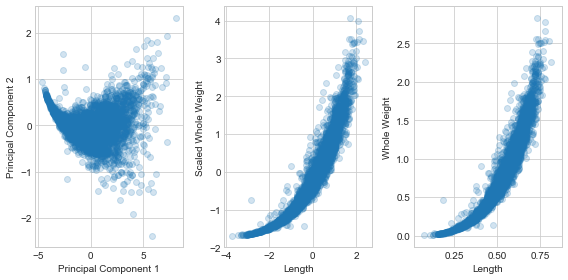

In [9]:
# Put scaled data into an array for useful plotting
scaled = data_scaled.values
unscaled = pca_data.values

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 4))
    #plt.figure
    
    plt.subplot(1,3,1)
    plt.scatter(XR[:,0],
                XR[:,1],alpha=0.2
               )
    #sns.stripplot(x=Y_sklearn[:,0])
    #plt.scatter(X_std[:,0],X_std[:,1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    
    plt.subplot(1,3,2)
    plt.scatter(scaled[:,0],
                scaled[:,1],alpha=0.2
               )
    #sns.stripplot(x=Y_sklearn[:,0])
    #plt.scatter(X_std[:,0],X_std[:,1])
    plt.xlabel('Length')
    plt.ylabel('Scaled Whole Weight')
    plt.legend(loc='lower center')
    plt.tight_layout()
    
    plt.subplot(1,3,3)
    plt.scatter(unscaled[:,0],
                unscaled[:,1],alpha=0.2
               )
    #sns.stripplot(x=Y_sklearn[:,0])
    #plt.scatter(X_std[:,0],X_std[:,1])
    plt.xlabel('Length')
    plt.ylabel('Whole Weight')
    plt.legend(loc='lower center')
    plt.tight_layout()
    
    #plt.subplot(1,4,4)
    #plt.scatter(w_b_l_w[:,0],
    #                w_b_l_w[:,1],alpha=0.6
    #           )
    #sns.stripplot(x=Y_sklearn[:,0])
    #plt.scatter(X_std[:,0],X_std[:,1])
    #plt.xlabel('Weight')
    #plt.ylabel('Wheel Base')
    #plt.legend(loc='lower center')
    #plt.tight_layout()
    
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


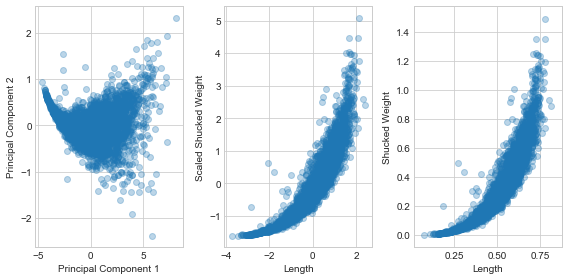

In [10]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1,3,1)
    plt.scatter(XR[:,0],
                XR[:,1],alpha=0.3
               )

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    
    plt.subplot(1,3,2)
    plt.scatter(scaled[:,0],
                scaled[:,2],alpha=0.3
               )

    plt.xlabel('Length')
    plt.ylabel('Scaled Shucked Weight')
    plt.legend(loc='lower center')
    plt.tight_layout()
    
    plt.subplot(1,3,3)
    plt.scatter(unscaled[:,0],
                unscaled[:,2],alpha=0.3
               )

    plt.xlabel('Length')
    plt.ylabel('Shucked Weight')
    plt.legend(loc='lower center')
    plt.tight_layout()
    
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


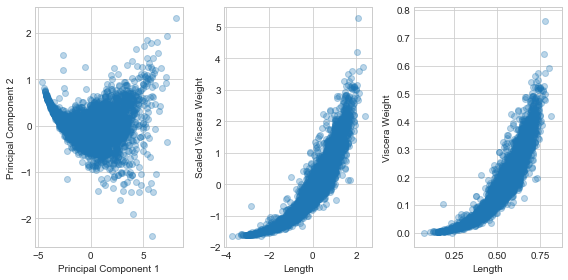

In [11]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1,3,1)
    plt.scatter(XR[:,0],
                XR[:,1],alpha=0.3
               )

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    
    plt.subplot(1,3,2)
    plt.scatter(scaled[:,0],
                scaled[:,3],alpha=0.3
               )

    plt.xlabel('Length')
    plt.ylabel('Scaled Viscera Weight')
    plt.legend(loc='lower center')
    plt.tight_layout()
    
    plt.subplot(1,3,3)
    plt.scatter(unscaled[:,0],
                unscaled[:,3],alpha=0.3
               )

    plt.xlabel('Length')
    plt.ylabel('Viscera Weight')
    plt.legend(loc='lower center')
    plt.tight_layout()
    
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


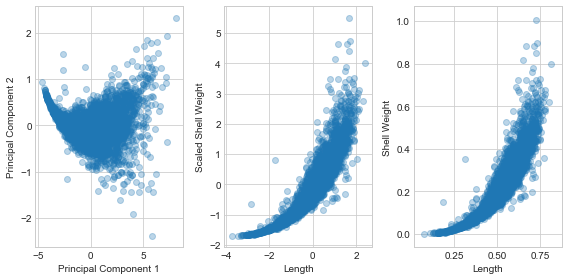

In [12]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1,3,1)
    plt.scatter(XR[:,0],
                XR[:,1],alpha=0.3
               )

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    
    plt.subplot(1,3,2)
    plt.scatter(scaled[:,0],
                scaled[:,4],alpha=0.3
               )

    plt.xlabel('Length')
    plt.ylabel('Scaled Shell Weight')
    plt.legend(loc='lower center')
    plt.tight_layout()
    
    plt.subplot(1,3,3)
    plt.scatter(unscaled[:,0],
                unscaled[:,4],alpha=0.3
               )

    plt.xlabel('Length')
    plt.ylabel('Shell Weight')
    plt.legend(loc='lower center')
    plt.tight_layout()
    
    plt.show()

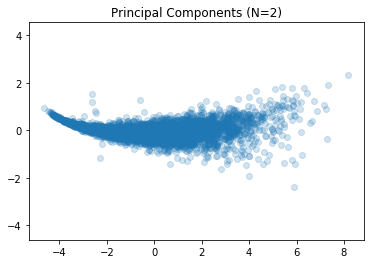

In [29]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
plt.scatter(XR[:, 0], XR[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    #draw_vector(XR.mean, XR.mean + v)
    
plt.axis('equal');
plt.title("Principal Components (N=2)")
plt.show()

In conclusion, Principal Component Analysis can be used to narrow down a wide array of numerical variables in very large datasets. It can show correlations between variables that appear more linear than uncorrelated variables. With this dataset, the length and various weights of an abalone show a correlation. Generally, as the length increases, the weight also increases.